In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
data = pd.DataFrame({
    'Delivery_time': [21, 13.5, 19.75, 24, 29, 15.35, 19, 9.5, 17.9, 18.75, 19.83, 10.75, 16.68, 11.5, 12.03, 14.88, 13.75, 18.11, 8, 17.83, 21.5],
    'Sorting_time': [10, 4, 6, 9, 10, 6, 7, 3, 10, 9, 8, 4, 7, 3, 3, 4, 6, 7, 2, 7, 5]
})

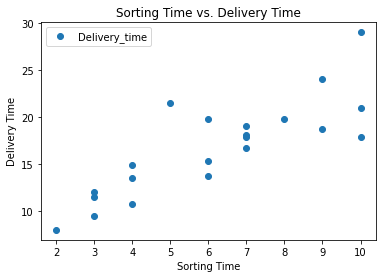

In [31]:
#Performing exploratory data analysis (EDA)
data.plot(x='Sorting_time', y='Delivery_time', style='o')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Sorting Time vs. Delivery Time')
plt.show()

In [32]:
X = data[['Sorting_time']]
y = data['Delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:

#Build the linear regression model with different transformations
models = []
transformations = ['none', 'log', 'sqrt', 'cbrt']

for transform in transformations:
    if transform == 'none':
        X_train_transformed = X_train
        X_test_transformed = X_test
    elif transform == 'log':
        X_train_transformed = np.log(X_train)
        X_test_transformed = np.log(X_test)
    elif transform == 'sqrt':
        X_train_transformed = np.sqrt(X_train)
        X_test_transformed = np.sqrt(X_test)
    elif transform == 'cbrt':
        X_train_transformed = np.cbrt(X_train)
        X_test_transformed = np.cbrt(X_test)
    
    model = LinearRegression()
    model.fit(X_train_transformed, y_train)
    models.append((transform, model))

In [34]:
#Model evaluation
for transform, model in models:
    X_test_transformed = X_test_transformed.astype(float)  # Convert transformed data back to float
    y_pred = model.predict(X_test_transformed)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f'Transformation: {transform}')
    print(f'R-squared: {r2}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}\n')

Transformation: none
R-squared: -10.30443831852105
Mean Squared Error: 78.57959251071661
Root Mean Squared Error: 8.864513100600428

Transformation: log
R-squared: 0.45354943931736147
Mean Squared Error: 3.7984958806261275
Root Mean Squared Error: 1.948973032298325

Transformation: sqrt
R-squared: -2.853439820491018
Mean Squared Error: 26.786092535234292
Root Mean Squared Error: 5.175528237313975

Transformation: cbrt
R-squared: -0.23779487062801707
Mean Squared Error: 8.604179509427402
Root Mean Squared Error: 2.9332881736078034



In [35]:
best_transform, best_model = models[0]  # Assuming the first model is the best based on evaluation

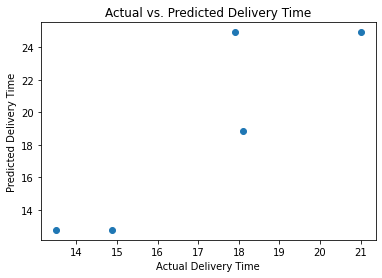

In [36]:
X_test_transformed = X_test.astype(float)  # Convert transformed data back to float
y_pred = best_model.predict(X_test_transformed)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs. Predicted Delivery Time')
plt.show()

In [37]:
#Model interpretation
best_transform, best_model = models[0]  # Assuming the first model is the best based on evaluation

coefficient = best_model.coef_[0]
intercept = best_model.intercept_

print(f'Best Transformation: {best_transform}')
print(f'Coefficient: {coefficient}')
print(f'Intercept: {intercept}')

Best Transformation: none
Coefficient: 2.024244553759662
Intercept: 4.682297962052008


In [38]:
#Calculate R-squared and MSE
X_test_transformed = X_test_transformed.astype(float)  # Convert transformed data back to float
y_pred = best_model.predict(X_test_transformed)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: -1.0207599586367362
Mean Squared Error: 14.046738956635016


In [39]:
#Predict delivery time
new_sorting_time = np.array([5, 8, 12]).reshape(-1, 1)
new_sorting_time_transformed = new_sorting_time  # Apply the same transformation used in the best model

if best_transform == 'log':
    new_sorting_time_transformed = np.log(new_sorting_time)
elif best_transform == 'sqrt':
    new_sorting_time_transformed = np.sqrt(new_sorting_time)
elif best_transform == 'cbrt':
    new_sorting_time_transformed = np.cbrt(new_sorting_time)

predicted_delivery_time = best_model.predict(new_sorting_time_transformed)

print('Predicted Delivery Time:')
for sorting_time, delivery_time in zip(new_sorting_time, predicted_delivery_time):
    print(f'Sorting Time: {sorting_time[0]}, Predicted Delivery Time: {delivery_time}')

Predicted Delivery Time:
Sorting Time: 5, Predicted Delivery Time: 14.803520730850318
Sorting Time: 8, Predicted Delivery Time: 20.876254392129304
Sorting Time: 12, Predicted Delivery Time: 28.973232607167954


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
